# Exploratory feature engineering

In [5]:
%pip install PyWavelets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_fetcher import get_raw_data
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

from src.visualization.plotting import plot_correlation_matrix



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()



x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
x_whole.reset_index(drop=True, inplace=True)
y_whole.reset_index(drop=True, inplace=True)

x_whole.head()

c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\src\features\feature_engineering.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sin_day_of_year"] = df["date_forecast"].apply(get_sin_day)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\src\features\feature_engineering.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cos_day_of_year"] = df["date_forecast"].apply(get_cos_day)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\src\features\feature_en

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,cloud_ratio,sun_addition,is_freezing,is_snow,is_rain
0,8.950,1.24900,0.00000,0.000000,523.099976,1.0,282.424988,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.828052,0.000000,0,0,0
1,4.200,1.25200,0.00000,0.000000,725.250000,0.0,271.299988,0.000000,0.000000,0.000000,...,0.707107,0.707107,0.000000,0.000000,0.000000,0.774987,0.000000,0,0,0
2,7.575,1.23975,0.00000,0.000000,1040.349976,1.0,279.774994,0.000000,0.000000,0.000000,...,0.707107,0.707107,0.000000,0.000000,0.000000,0.803675,0.000000,0,0,0
3,8.525,1.23250,406653.21875,66.824997,2028.300049,0.0,281.750000,17.174999,85737.351562,0.000000,...,-0.707107,-0.707107,0.000000,0.116874,0.000676,1.000000,17.174999,0,0,0
4,3.900,1.26975,228987.65625,97.699997,3737.000000,0.0,270.299988,58.224998,145324.328125,16.700001,...,0.866025,-0.500000,972.357544,0.151533,0.135800,0.831004,74.925003,0,0,0


## Removing of features with low variance

In [7]:
# Find name of all the columns that have a correlation of 0.9 or higher with pv_measurement
data_with_target = pd.concat([x_whole, y_whole], axis=1)
corr_matrix = data_with_target.corr()
corr_matrix["pv_measurement"].sort_values(ascending=False)


pv_measurement                    1.000000
sun_addition                      0.657038
direct_rad:W                      0.622384
sun_product                       0.616239
direct_rad_1h:J                   0.613314
clear_sky_rad:W                   0.603887
modified_solar_elevation          0.598200
clear_sky_energy_1h:J             0.595419
diffuse_rad:W                     0.529251
diffuse_rad_1h:J                  0.524499
effective_radiation               0.417271
is_day:idx                        0.394098
location_a                        0.355057
t_1000hPa:K                       0.290041
dew_point_2m:K                    0.222257
absolute_humidity_2m:gm3          0.216766
visibility:m                      0.159721
pressure_100m:hPa                 0.149798
pressure_50m:hPa                  0.145867
sfc_pressure:hPa                  0.141928
msl_pressure:hPa                  0.131863
sin_hour                          0.125223
cloud_base_agl:m                  0.103004
sin_day_of_

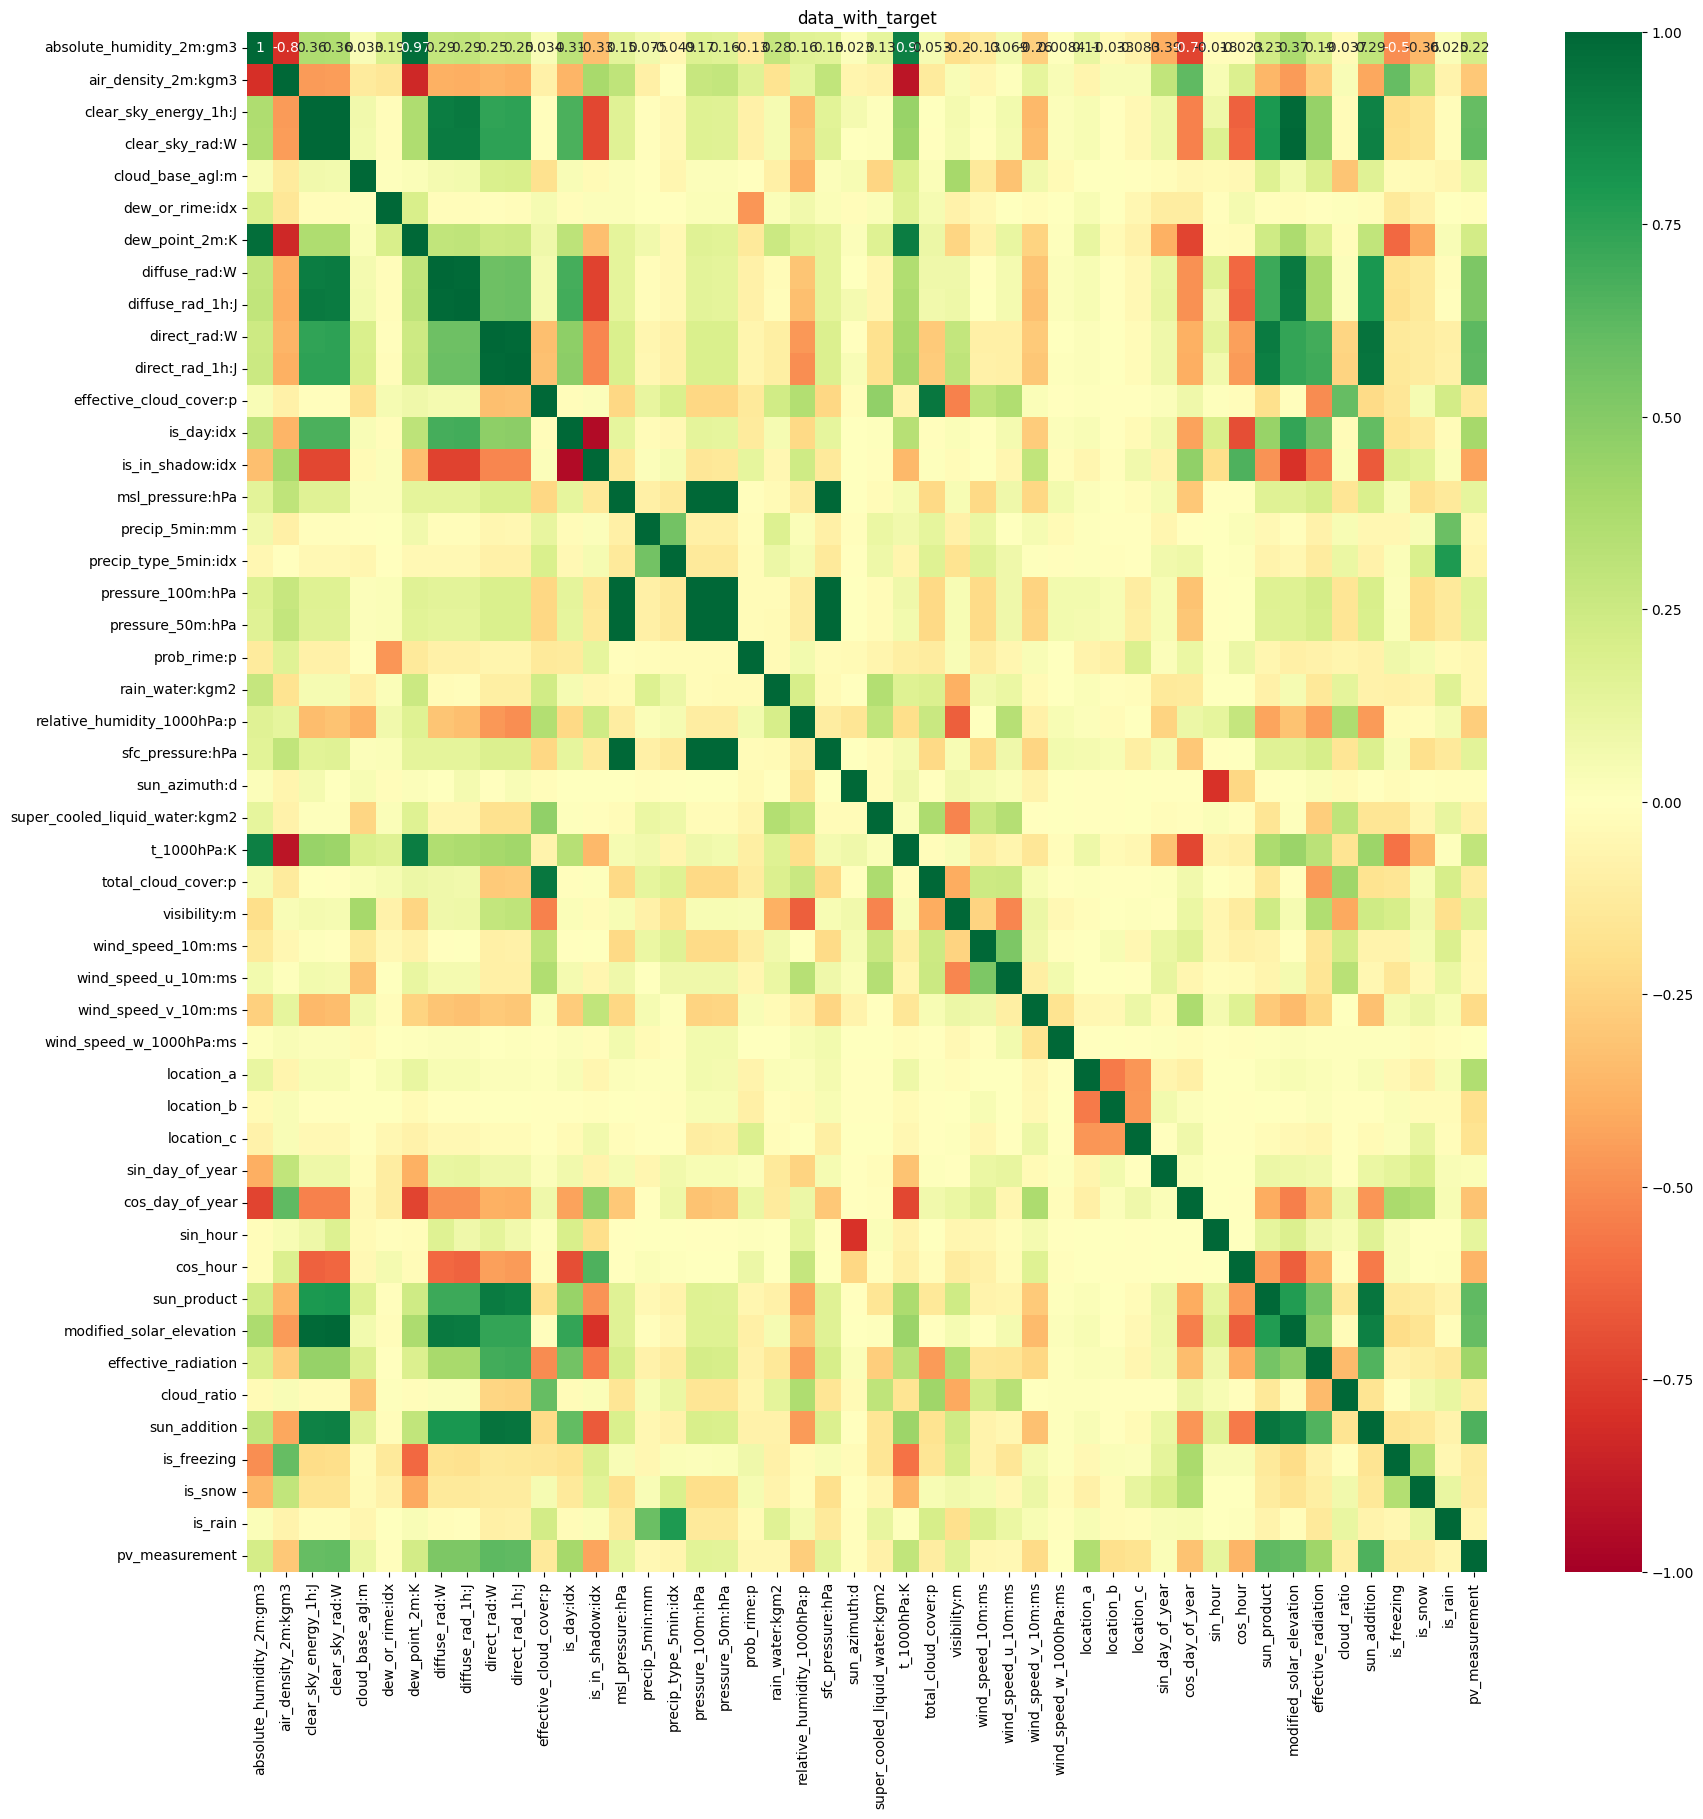

In [8]:

data_with_target = pd.concat([x_whole, y_whole], axis=1)
plot_correlation_matrix(data_with_target, "data_with_target", show=True)

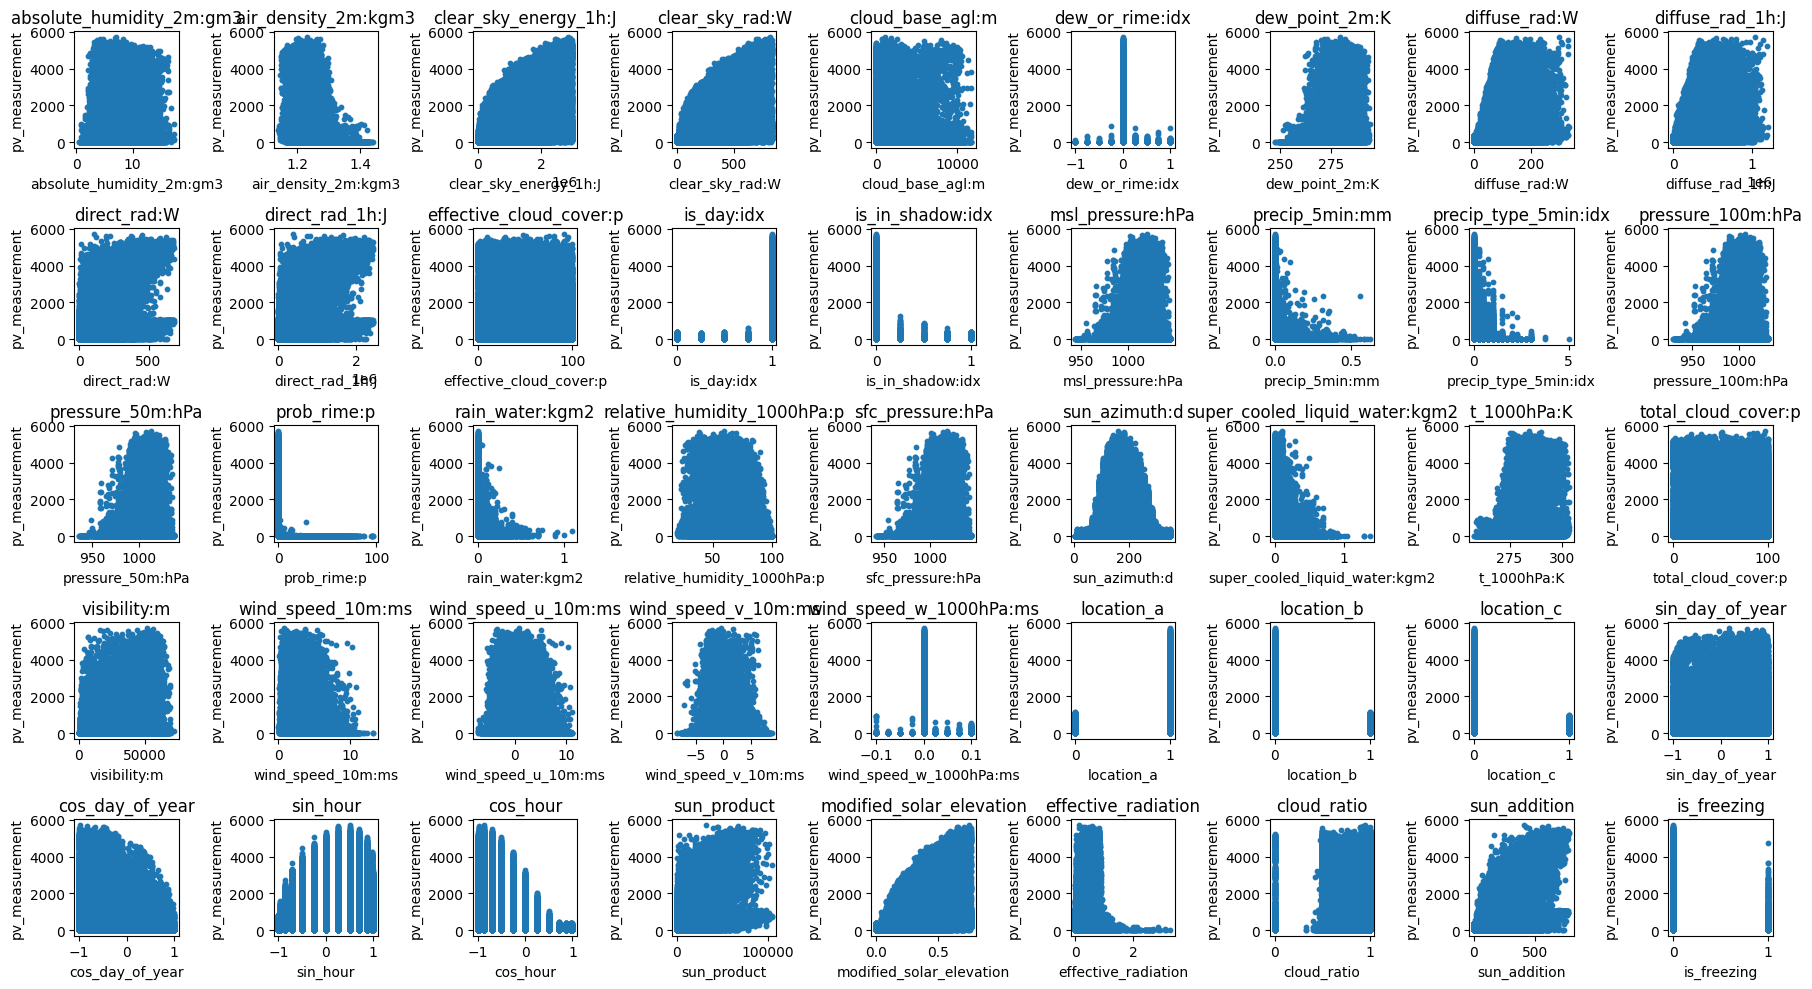

In [13]:
fig, axs = plt.subplots(5, 9, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target.columns):
    ax.scatter(data_with_target[feature], data_with_target['pv_measurement'], s=5)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()